<a href="https://colab.research.google.com/github/olesyamba/Risk_analysis/blob/main/Risk_measure(VaR_and_ES).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import yfinance as yf # Yahoo Finance API

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt #Basic ploting
import pandas as pd # Storing and processing data
import numpy as np # Basic calculus
import scipy.stats as ss # Fittings and manipulating distributions
import seaborn as sns # Some extra ploting

### Assume that we invest in a single stock

In [ ]:
# Lets look at the historical prices of Apple Inc.

quotes = yf.download("AAPL", "2016-01-01", "2020-12-31")
quotes.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.151491,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.546272,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.085482,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.111176,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.228081,283192000


### Look at the price trajectory

- get the first perception of riskness of this stock investment

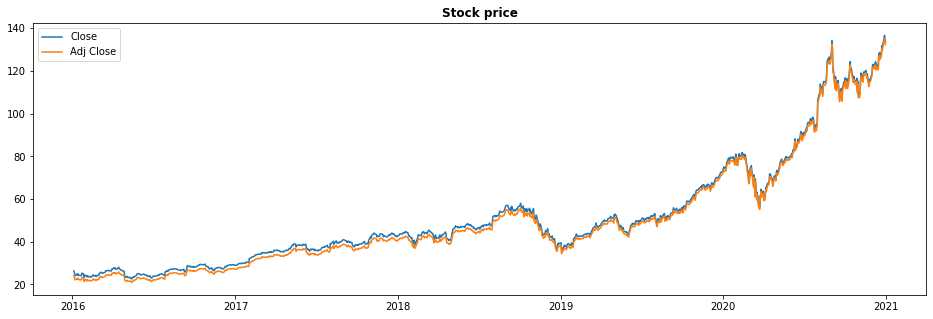

In [ ]:
# Look at the price trajectory

plot_fields = ["Close", "Adj Close"]
fig = plt.figure(figsize=(16, 5))
plt.plot(quotes[plot_fields])
plt.legend(plot_fields)
plt.title("Stock price", weight="bold")
plt.show()

### Select the data type and calculate P&L on the specific time horizon

Return styles

$$r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$$
$$R_t = \frac{P_t}{P_{t-1}} - 1$$

In [ ]:
# Limit ourselves with the one-day horizon
# Apply relative measure of P&L - returns

prices = quotes["Adj Close"]
returns_log = np.log(prices).diff() # log-returns
returns = prices.pct_change()  # arithmetic (simple) returns
print(returns,'\n')

print('Returns style difference:\n', returns - returns_log)

Date
2016-01-04         NaN
2016-01-05   -0.025059
2016-01-06   -0.019570
2016-01-07   -0.042204
2016-01-08    0.005287
                ...   
2020-12-23   -0.006976
2020-12-24    0.007712
2020-12-28    0.035766
2020-12-29   -0.013315
2020-12-30   -0.008527
Name: Adj Close, Length: 1258, dtype: float64 

Returns style difference:
 Date
2016-01-04         NaN
2016-01-05    0.000319
2016-01-06    0.000194
2016-01-07    0.000916
2016-01-08    0.000014
                ...   
2020-12-23    0.000024
2020-12-24    0.000030
2020-12-28    0.000625
2020-12-29    0.000089
2020-12-30    0.000037
Name: Adj Close, Length: 1258, dtype: float64


In [ ]:
returns.dropna(inplace=True)
print(returns)

Date
2016-01-05   -0.025059
2016-01-06   -0.019570
2016-01-07   -0.042204
2016-01-08    0.005287
2016-01-11    0.016192
                ...   
2020-12-23   -0.006976
2020-12-24    0.007712
2020-12-28    0.035766
2020-12-29   -0.013315
2020-12-30   -0.008527
Name: Adj Close, Length: 1257, dtype: float64


### Now we look at the P&L series

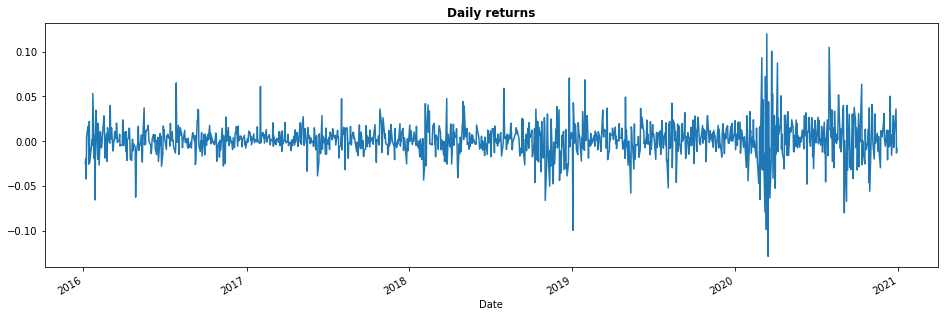

In [ ]:
fig = plt.figure(figsize=(16, 5))
returns.plot()
plt.title("Daily returns", weight="bold")
plt.show()

### Explore the empirical distribution

<Figure size 1152x360 with 0 Axes>

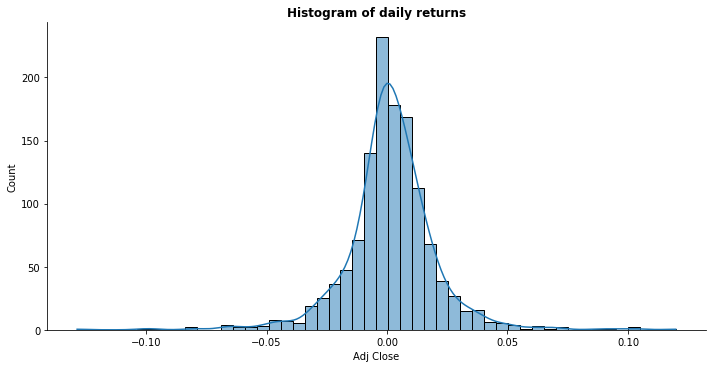

In [ ]:
#важно понимать с какой стороны находятся риски, в нашем случае - это отрицательная доходность, поэтому слева, а в кредитных рисках убытки отображаются справа
fig = plt.figure(figsize=(16, 5))
sns.displot(
    returns,
    kind="hist",
    bins=50,
    kde=True,
    aspect=2,
)

plt.title("Histogram of daily returns", weight="bold")
plt.show()
# Можем использовать эмпирическое историческое распределение, можем использовать идеализированное кде, которое иммитирует неприрывную величину, а можем сгенерить любое распрежедение и с ним работать

### Let's consider normal distribution as a candidate for return distribution

The key packages: *scipy* and its module *stats*. [Here](https://docs.scipy.org/doc/scipy/reference/stats.html) you can find the full list of available distributions as well as formulas, tips, and code snippets on them.

In [ ]:
# мы можем генерить любое распределение, из него вытаскивать параметры конкретного распределения и засовывать туда данные обратно, чтобы подогнать их под определенное распределение
params_normal_distribution = ss.norm.fit(returns) # stats module allows for fitting various types of distribution
print('Parameters of fitted normal distribution:\n mean, std \n',[round(x, 4) for x in params_normal_distribution])

# Можно взять распределение стьюдента. Первый параметр - специфическое для распределение, а второе и третий - это сдвиг и масштаб (мат ожидание и дисперсия для норм распр)
# params_normal_distribution = ss.t.fit(returns) # stats module allows for fitting various types of distribution
# print('Parameters of fitted t distribution:\n mean, std \n',[round(x, 4) for x in params_normal_distribution])

Parameters of fitted normal distribution:
 mean, std 
 [0.0015, 0.019]


### Let's see if normal distribution is fairly close representation of realized returns


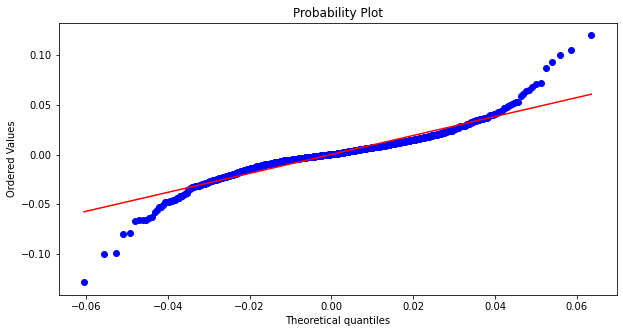

In [ ]:
#QQ-plot Quantile Quantile, сравнивает как распределение совпадает с данными, если точки и линия совпали, то распр подходит, у нас на хвостах отклонения, поэтому вероятность получить очень большой профит и очень большие убытки оценивается неправильно (распр на самом деле не норм)
fig = plt.figure(figsize=(10, 5))
ss.probplot(returns, dist = ss.norm(*params_normal_distribution), plot=plt)
plt.show()

Q-Q, P-P and Probability plots are very similar to each other. Here is the difference.

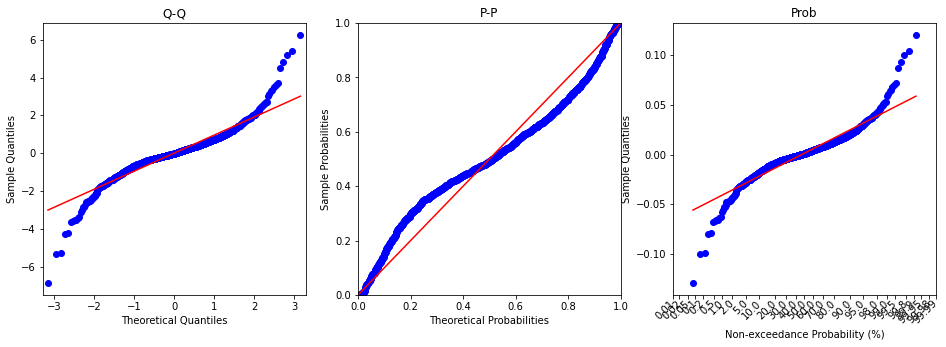

In [ ]:
# pp probability plot - второй способ посмотреть подходит ли распределение
import statsmodels.graphics.gofplots
pp = statsmodels.graphics.gofplots.ProbPlot(returns, dist = ss.norm, fit=True)

fig = plt.figure(figsize=(16, 5))

plt1 = fig.add_subplot(1, 3, 1)
plt2 = fig.add_subplot(1, 3, 2)
plt3 = fig.add_subplot(1, 3, 3)

pp.qqplot(ax=plt1.axes, line="r")
plt1.set_title("Q-Q")

pp.ppplot(ax=plt2.axes, line="45")
plt2.set_title("P-P")

pp.probplot(ax=plt3.axes, line="r")
plt3.set_title("Prob")

plt.show()

Now the same for the Student-t distribution.

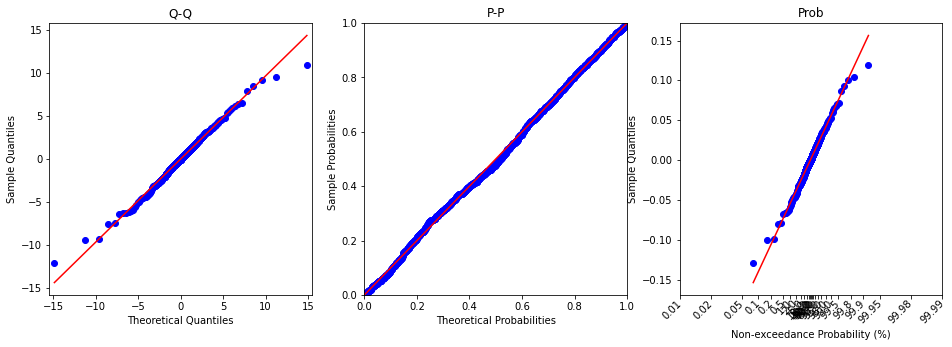

In [ ]:
# а вот стьюдент сильно лучше
# 252 дня - норма в году, выбрасываются выбросы, праздники и тд
pp = statsmodels.graphics.gofplots.ProbPlot(returns, dist = ss.t, fit=True)
fig = plt.figure(figsize=(16, 5))

plt1 = fig.add_subplot(1, 3, 1)
plt2 = fig.add_subplot(1, 3, 2)
plt3 = fig.add_subplot(1, 3, 3)

pp.qqplot(ax=plt1.axes, line="r")
plt1.set_title("Q-Q")

pp.ppplot(ax=plt2.axes, line="45")
plt2.set_title("P-P")

pp.probplot(ax=plt3.axes, line="r")
plt3.set_title("Prob")

plt.show()

### Now let's move to measuring risk when we have kind-of statistical model

**Introduce some notations**

$VaR_{\gamma}$ - Value-at-Risk with $\gamma$ % confidence level

$\alpha = 1 - \gamma$ - probability of extreme losses greater thn VaR

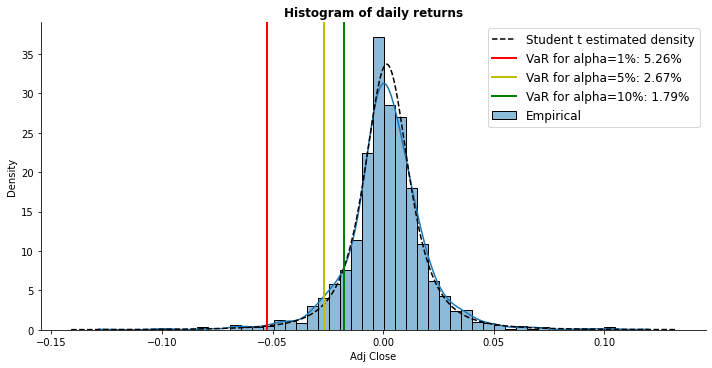

In [ ]:
# HS stands for Historical Simulation

# VaR - это quantile, уровень убытков, вероятность превысить которые не меньше, чем гамма (гамма это уровень надежности расчетов = 99 и тд)
# Если убытки слева, то уровень квантиля равен 1-гамма, слева считаем, а если убытки справа, то квантиль берется прямо от гаммы

# Calculate VaR on three confidence levels
VaR_HS_99 = - returns.quantile(0.01, interpolation = 'higher')
VaR_HS_95 = - returns.quantile(0.05, interpolation = 'higher')
VaR_HS_90 = - returns.quantile(0.10, interpolation = 'higher')

# по модулю 90 самый маленький, по сути это насколько мы боимя риска, 90 это значит, что слева 10, справа 90, справа часть меньше чем в случае с 99 и 95
# сначала применяется метод квантиль, потом умножается на -1, чтобы обратный порядок сделать, надо (- returns).quantile, например в случае, если убытки справа, можно домножить на -1 и они будут слева
# интерполяция - это выбор из интервала значений, который выводит квантиль (зачем мне тратить больший капитал на сделку, если вероятность такая же), если убыток слева - берем хаер, если справа- лоуер

# Adds histogram
sns.displot(
    returns,
    kind="hist",
    bins=50,
    aspect=2,
    stat="density",
    kde=True, label="Empirical"
)


#Fits t-distribution
params_student_distr = ss.t.fit(returns)

#Plots fitted distribution
x = np.linspace(*plt.xlim(), 1000)
plt.plot(x, ss.t(*params_student_distr).pdf(x), 'k--', label="Student t estimated density")

# Adds VaR cut-off lines
plt.axvline(x=-VaR_HS_99, linewidth=2, color="r", label="VaR for alpha=1%: {:.2f}%".format(100 * VaR_HS_99),)
plt.axvline(x=-VaR_HS_95, linewidth=2, color="y", label="VaR for alpha=5%: {:.2f}%".format(100 * VaR_HS_95),)
plt.axvline(x=-VaR_HS_90, linewidth=2, color="g", label="VaR for alpha=10%: {:.2f}%".format(100 * VaR_HS_90),)

plt.title("Histogram of daily returns", weight="bold")

plt.legend(fontsize=12)

plt.show()

### Empirical estimates of VaR and ES

VaR = 2.67%,
ES = 4.47%


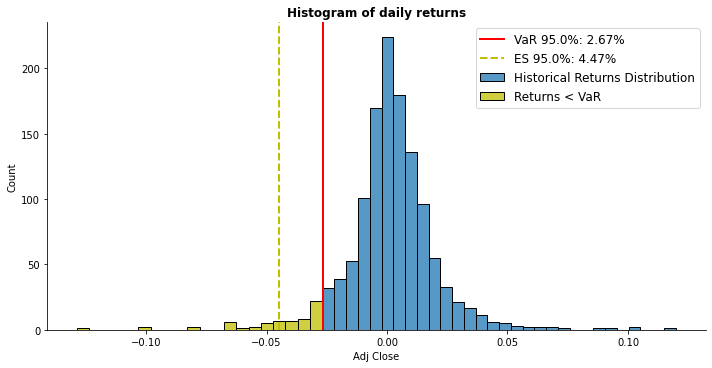

In [ ]:
# Generalize a little

level = 0.95
# level is the same as gamma, alpha = 1 - level

# VaR empirical estimate
VaR_HS = -returns.quantile(1 - level, interpolation = 'higher')

# экспектед шорт фол - это какие будут убытки, если вар все-таки будет превышен, страховщики,например, считают, сколько надо иметь в запасе, если водитель все-таки сломает тачку
# это эмпирический способ расчетов, он плох, потому что у него оценка строится на основе маленького количества наблюдений (гамма*кол наб = 12)

# Expected Shortfall empirical estimate
ES_HS = -returns[returns < -VaR_HS].mean()

print('VaR = {:.2%},\nES = {:.2%}'.format(VaR_HS, ES_HS))

sns.displot(
    returns[returns >= -VaR_HS], kind="hist", bins=30, aspect=2, label="Historical Returns Distribution",
)

sns.histplot(
    returns[returns < -VaR_HS], bins=20, color='y', label="Returns < VaR",
)

plt.axvline(-VaR_HS, linewidth=2, color="r", label=f"VaR {level*100}%: {100 * VaR_HS:.2f}%",)
plt.axvline(-ES_HS, linewidth=2, color="y", linestyle="dashed", label=f"ES {level*100}%: {100 * ES_HS:.2f}%",)

plt.title("Histogram of daily returns", weight="bold")
plt.legend(fontsize=12)

plt.show()

### Parametric estimates of VaR and ES

In [ ]:
# Lets fit t-student distribution

fitted_dist = ss.t(*ss.t.fit(returns)) # this is an instance of the specified distribution

# note that level here is inherited from the calculation above
VaR_param = - fitted_dist.ppf(1-level) # ppf - percent point function


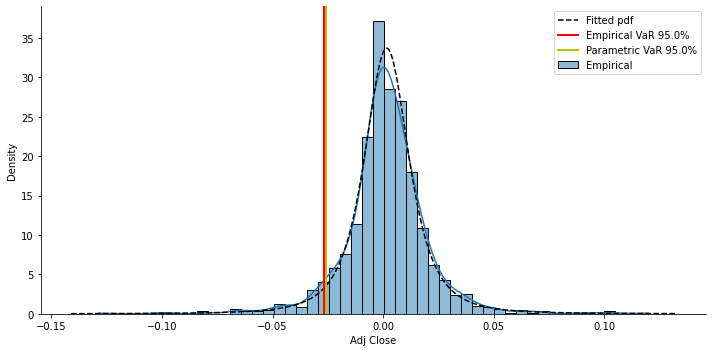

In [ ]:
sns.displot(
    returns,
    kind="hist",
    stat="density",
    bins=50,
    kde=True,
    aspect=2,
    label="Empirical"
)

x = np.linspace(*plt.xlim(), 1000)
plt.plot(x, fitted_dist.pdf(x), 'k--', label="Fitted pdf")

plt.axvline(x=-VaR_HS, linewidth=2, color='r', label=f"Empirical VaR {level*100}%",)
plt.axvline(x=-VaR_param, linewidth=2, color="y", label=f"Parametric VaR {level*100}%")
plt.legend()

# Если поменять распределение на норм и задать уровень 99, но парам будет сильно правее эмпирической оценки, так как распределение не очень подходит и оно будет недооценивать риски

### VaR is just a quantile, ES is a conditional expectation  

$$ES_\gamma = E[Loss\,|\,Loss>VaR_\gamma]=E[r\,|\,r < -VaR]=\frac{1}{1-\gamma}\int_{-\infty}^{-VaR_\gamma}x\,f(x)\,dx$$

$$\alpha = 1 - \gamma$$

In [ ]:
# Мы работаем с левым хвостом, поэтому берем интеграл от - бесконечности до - вара, если работаем с правым хвостом, то наоборот
# Numerical integration for calculating ES

import scipy.integrate
ES_param, _ = scipy.integrate.quad(
    lambda x: - x * fitted_dist.pdf(x) / (1 - level),
    - np.inf,
    - VaR_param,
    )

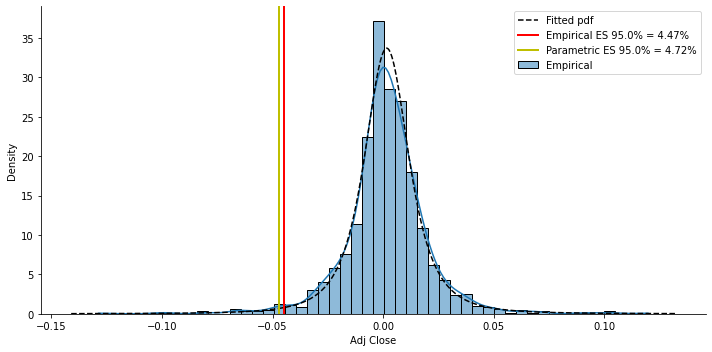

In [ ]:
sns.displot(
    returns,
    kind="hist",
    stat="density",
    bins=50,
    kde=True,
    aspect=2,
    label="Empirical",
)

x = np.linspace(*plt.xlim(), 1000)
plt.plot(x, fitted_dist.pdf(x), 'k--', label="Fitted pdf")

plt.axvline(x=-ES_HS, linewidth=2, color='r', label=f"Empirical ES {level*100}% = {round(ES_HS*100,2)}%")
plt.axvline(x=-ES_param, linewidth=2, color="y", label=f"Parametric ES {level*100}% = {round(ES_param*100,2)}%")
plt.legend()
# в легенде не отмечены минусы у варов, потому что принято их так выражать, но на графике мы их откладываем слева, как отрицательные значения, так как это убытки (вар = 4,5 < вар = 4,7, поэтому 4,7 на графике левее, как ни странно)

### Monte-Carlo Simulation for estimating VaR and ES

In [ ]:
# Objects from stats module allows for sampling from specified distribution. Use "rvs" method.

VAR_MC = pd.Series(fitted_dist.rvs(10_000)).quantile(1 - level, interpolation = 'higher')
print('VaR_MC = {:.2%}'.format(-VAR_MC))

VaR_MC = 2.68%
